In [2]:
# method for detecting relevant peaks of a signal with low freq noise

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import signal
import librosa
from librosa import display

In [3]:
# Load a wav file
filename = 'Henderson2.wav'
y, sr = librosa.load(filename)
sr

22050

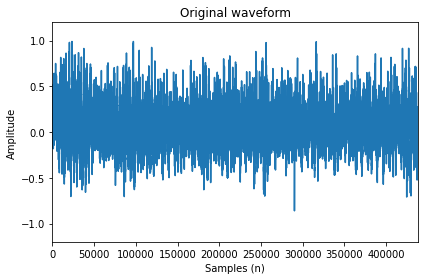

In [4]:
# plot original waveform
plt.plot(y)
plt.title('Original waveform')
plt.axis([0, len(y), -1.2, 1.2])
plt.xlabel('Samples (n)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

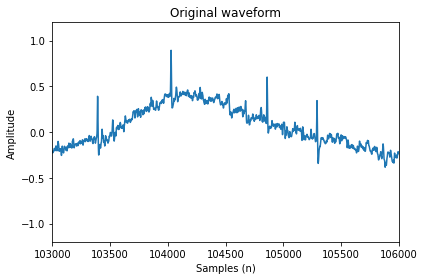

In [5]:
# plot original waveform zoomed
plt.plot(y)
plt.title('Original waveform')
plt.axis([103000, 106000, -1.2, 1.2])
plt.xlabel('Samples (n)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'probability')

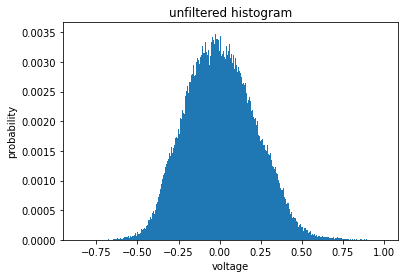

In [6]:
# unfiltered histogram
hist = plt.hist(y,bins=1000,weights=np.ones(len(y)) / len(y))

plt.figure(1,1);
plt.title('unfiltered histogram')
plt.xlabel('voltage')
plt.ylabel('probability')

Text(0.5, 0, 'Frequency (Hz)')

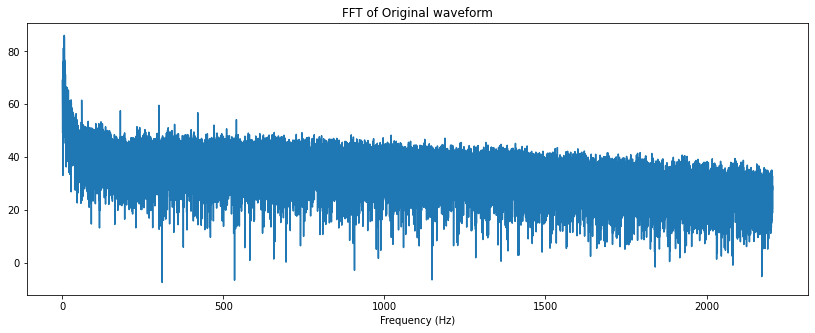

In [7]:
# plot fft of original waveform
N = len(y)
Y = scipy.fft.fft(y[:N])
Y_mag = np.absolute(Y)        # spectral magnitude
f = np.linspace(0, sr, N)     # frequency variable
plt.figure(figsize=(14, 5))
plt.title('FFT of Original waveform')
plt.plot(f[:int(N/10)], 20*np.log10(Y_mag[:int(N/10)])) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
#plt.vlines(30,0,80,colors='r',label='30Hz')
#plt.legend()

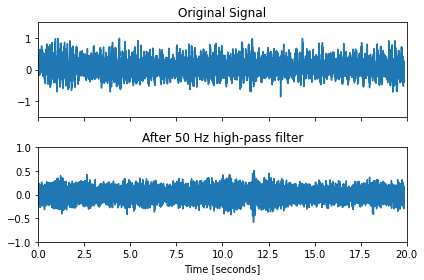

In [8]:
# design high pass filter to reduce low freq noise
f0 = 30   # cutoff freq in Hz
wn = 2*np.pi*(f0/sr)  # cutoff freq in rad/sample
t = np.linspace(0,len(y)/sr,len(y))

# plot original signal
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, y)
ax1.set_title('Original Signal')
ax1.axis([0, 1, -1.5, 1.5])

# filter signal
sos = signal.butter(201, 50, 'hp', fs=sr, analog=False, output='sos')
filtered = signal.sosfilt(sos, y)

# plot filtered signal
ax2.plot(t, filtered)
ax2.set_title('After 50 Hz high-pass filter')
ax2.axis([0, 20, -1, 1])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

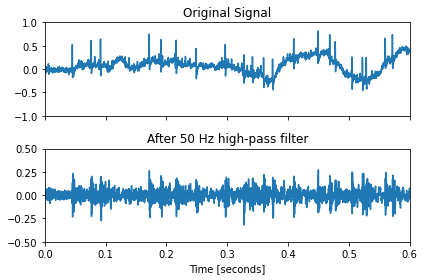

In [9]:
# plot zoomed in

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, y)
ax1.set_title('Original Signal')
ax1.axis([0, 1, -1, 1])

ax2.plot(t, filtered)
ax2.set_title('After 50 Hz high-pass filter')
ax2.axis([0, 0.6, -.5, .5])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Magnitude (dB)')

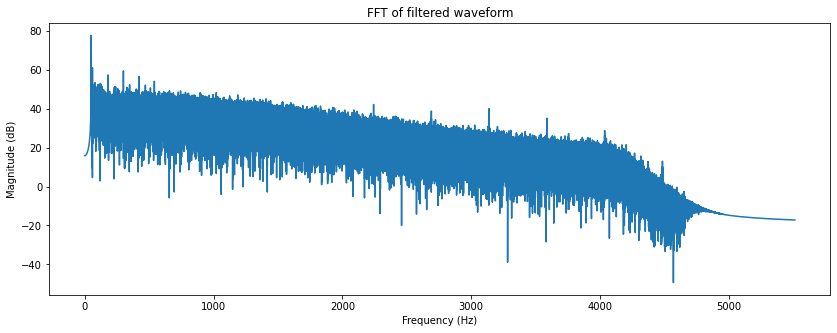

In [10]:
# plot fft of filtered signal
N = len(y)
Yf = scipy.fft.fft(filtered[:N])
Yf_mag = np.absolute(Yf)        # spectral magnitude
f = np.linspace(0, sr, N)     # frequency variable
plt.figure(figsize=(14, 5))
plt.title('FFT of filtered waveform')
plt.plot(f[:int(N/4)], 20*np.log10(Yf_mag[:int(N/4)])) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
#plt.vlines(30,0,60,colors='r',label='filter cutoff = 30Hz')
#plt.legend()

Text(0, 0.5, 'probability')

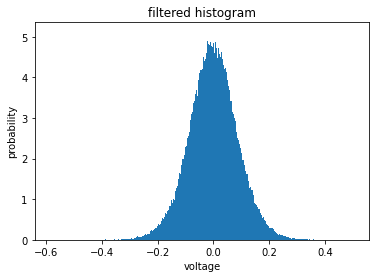

In [12]:
hist_filt = plt.hist(filtered,bins=1000,density=True,stacked=True)

plt.figure(1,1);
plt.title('filtered histogram')
plt.xlabel('voltage')
plt.ylabel('probability')

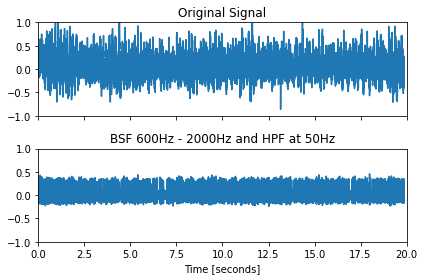

In [22]:
# design bandpass filter

hbsf = signal.firwin(2001,[3000,4000],width=20,window='hamming',pass_zero='bandstop',fs=sr)
y_filt1 = np.convolve(y,hbsf,'same')
hhpf = signal.firwin(2001,cutoff=600,width=20,window='hamming',pass_zero='highpass',fs=sr)
y_filt2 = np.convolve(y_filt1,hhpf,'same')

# plot outputs
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, y)
ax1.set_title('Original Signal')
ax1.axis([0, 1, -1, 1])

ax2.plot(t, y_filt2)
ax2.set_title('BSF 600Hz - 2000Hz and HPF at 50Hz')
ax2.axis([0, 20, -1, 1])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Magnitude (dB)')

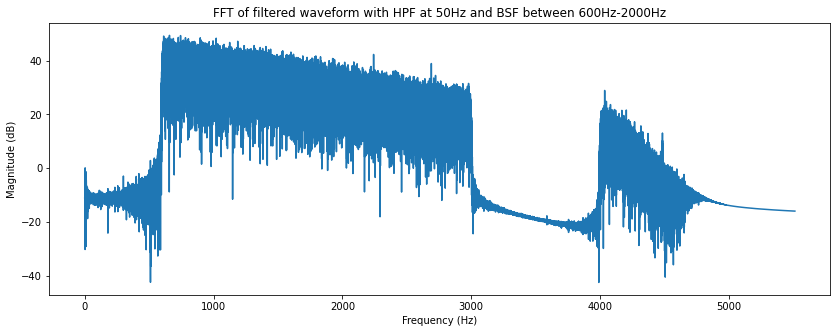

In [23]:
# plot fft of filtered signal
N = len(y_filt2)
Yf = scipy.fft.fft(y_filt2[:N])
Yf_mag = np.absolute(Yf)        # spectral magnitude
f = np.linspace(0, sr, N)     # frequency variable
plt.figure(figsize=(14, 5))
plt.title('FFT of filtered waveform with HPF at 50Hz and BSF between 600Hz-2000Hz')
plt.plot(f[:int(N/4)], 20*np.log10(Yf_mag[:int(N/4)])) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
#plt.vlines(30,0,60,colors='r',label='filter cutoff = 30Hz - 6000Hz')
#plt.legend()

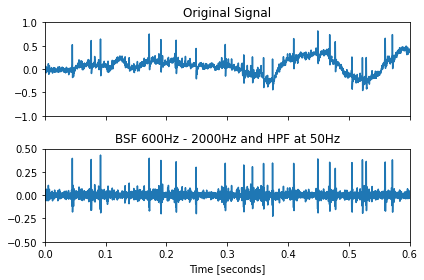

In [24]:
# plot zoomed in

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, y)
ax1.set_title('Original Signal')
ax1.axis([0, 1, -1, 1])

ax2.plot(t, y_filt2)
ax2.set_title('BSF 600Hz - 2000Hz and HPF at 50Hz')
ax2.axis([0, 0.6, -.5, .5])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

(-0.2, 0.2)

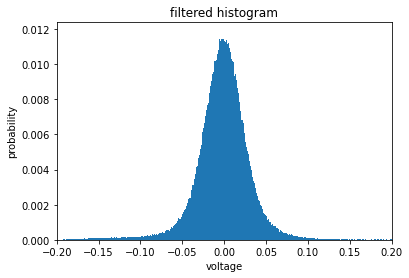

In [25]:
hist_filt = plt.hist(y_filt2,bins=1000,weights=np.ones(len(y_filt2)) / len(y_filt2))

plt.figure(1,1);
plt.title('filtered histogram')
plt.xlabel('voltage')
plt.ylabel('probability')
plt.xlim([-.2, .2])

In [85]:
# comb filter at 60Hz ?
fc = 61
delay = 1/fc
K = int(np.ceil(sr*delay))
combed = np.zeros(len(y))

for i in range(0,len(y)):
    combed[i] = y[i] - y[i-K]
    
hhpf = signal.firwin(2001,cutoff=100,width=20,window='hamming',pass_zero='highpass',fs=sr)
y_filt2 = np.convolve(combed,hhpf,'same')

257651

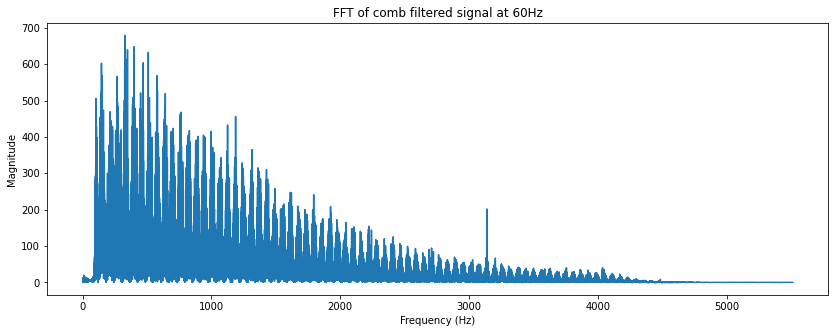

In [86]:
# plot fft of filtered signal
N = len(y_filt2)
Yf = scipy.fft.fft(y_filt2[:N])
Yf_mag = np.absolute(Yf)        # spectral magnitude
f = np.linspace(0, sr, N)     # frequency variable
plt.figure(figsize=(14, 5))
plt.title('FFT of comb filtered signal at 60Hz')
plt.plot(f[:int(N/4)], Yf_mag[:int(N/4)]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.vlines(300,0,1000,colors='r',label='60Hz')
#plt.legend()
np.argmax(y_filt2)

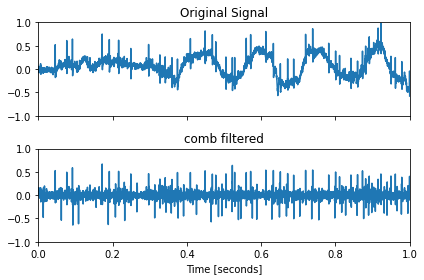

In [87]:
# plot outputs
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, y)
ax1.set_title('Original Signal')
ax1.axis([0, 1, -1, 1])

ax2.plot(t, y_filt2)
ax2.set_title('comb filtered')
ax2.axis([0, 1, -1, 1])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

(-0.2, 0.2)

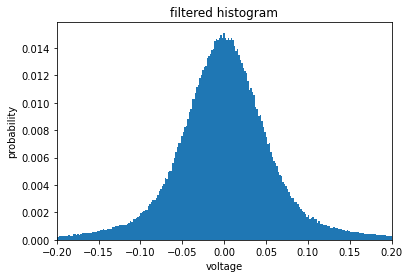

In [88]:
hist_filt = plt.hist(y_filt2,bins=1000,weights=np.ones(len(y_filt2)) / len(y_filt2))

plt.figure(1,1);
plt.title('filtered histogram')
plt.xlabel('voltage')
plt.ylabel('probability')
plt.xlim([-.2, .2])

(array([8.54346850e-08, 6.72470914e-08, 3.37975476e-08, ...,
        8.42606030e-12, 2.73283198e-12, 5.47397330e-12]),
 array([0.00000000e+00, 5.03676496e-02, 1.00735299e-01, ...,
        1.10248741e+04, 1.10249244e+04, 1.10249748e+04]),
 <matplotlib.lines.Line2D at 0x1607d14d0>)

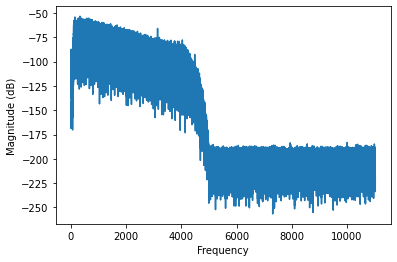

In [89]:
plt.magnitude_spectrum(y_filt2,Fs=sr,scale='dB')